<a href="https://colab.research.google.com/github/anyuanay/medium/blob/main/src/hf_stableDiff_text_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Huggingface Stable Diffusion Model to Generate Image from Text

## Install Huggingface Tansformers and diffusers

In [1]:
!pip install --upgrade diffusers transformers -q

## Import Libraries

In [2]:
import torch

from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed

## Set up an Attribute Class

In [3]:
class TTI:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400,400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

## Define the Image Generation Model Using StableDiffusionPipeline

In [4]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    TTI.image_gen_model_id, torch_dtype = torch.float16,
    revision="fp16", guidance_scale=9
)

image_gen_model = image_gen_model.to(TTI.device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


## Define the Image Generation Function

In [5]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps = TTI.image_gen_steps,
        generator = TTI.generator,
        guidance_scale = TTI.image_gen_guidance_scale
    ).images[0]

    image = image.resize(TTI.image_gen_size)

    return image

## Test to Generat Images from Text

  0%|          | 0/35 [00:00<?, ?it/s]

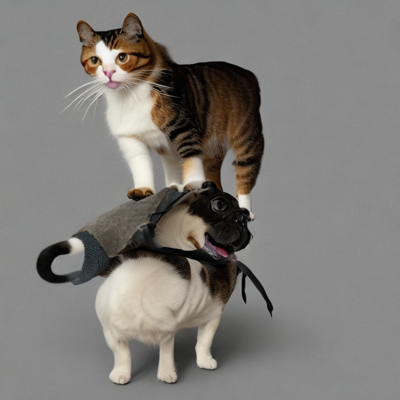

In [7]:
generate_image("a cat is riding a dog.", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

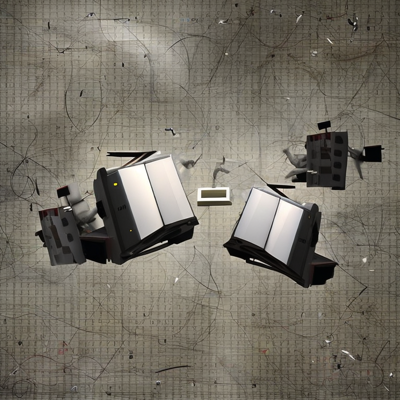

In [8]:
generate_image("two flying computers in fight.", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

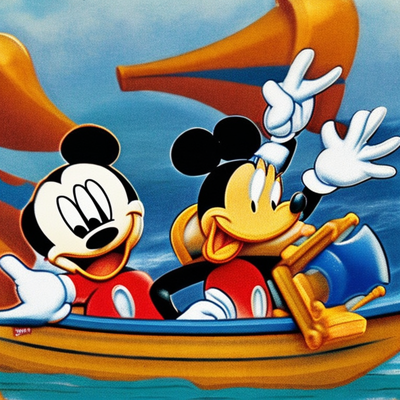

In [10]:
generate_image("mickey mouse hugs donald duck on a boat.", image_gen_model)